In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib
import matplotlib.font_manager as fm
## 맥북용 한글
mpl.rcParams['font.family'] = 'AppleGothic'
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스(-) 부호 깨짐 방지
## 윈도우용 한글
# font_path = "C:\\Windows\\Fonts\\gulim.ttc" #윈도우 os 폰트경로
# font_prop = fm.FontProperties(fname=font_path)
# font_name = font_prop.get_name() # 폰트명
# matplotlib.rc('font',family=font_name)

In [2]:
df = pd.read_csv('data/apple_quality.csv')
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good


### 데이터 구조

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


### 데이터 요약 및 기술통계

In [4]:
df.describe(include='object')

,Quality
count,4000
unique,2
top,good
freq,2004


In [5]:
print(df.value_counts('A_id'), end='\n\n')
print(df.value_counts('Size'), end='\n\n')
print(df.value_counts('Weight'), end='\n\n')
print(df.value_counts('Sweetness'), end='\n\n')
print(df.value_counts('Crunchiness'), end='\n\n')
print(df.value_counts('Juiciness'), end='\n\n')
print(df.value_counts('Ripeness'), end='\n\n')
print(df.value_counts('Acidity'), end='\n\n')
print(df.value_counts('Quality'), end='\n\n')

A_id
0       1
2671    1
2658    1
2659    1
2660    1
       ..
1338    1
1339    1
1340    1
1341    1
3999    1
Name: count, Length: 4000, dtype: int64

Size
-7.151703    1
 0.375263    1
 0.357199    1
 0.359663    1
 0.360016    1
            ..
-1.355544    1
-1.354863    1
-1.353416    1
-1.352830    1
 6.406367    1
Name: count, Length: 4000, dtype: int64

Weight
-7.149848    1
-0.331393    1
-0.344738    1
-0.344148    1
-0.342542    1
            ..
-1.630329    1
-1.630200    1
-1.628474    1
-1.627618    1
 5.790714    1
Name: count, Length: 4000, dtype: int64

Sweetness
-6.894485    1
 0.321272    1
 0.305403    1
 0.305770    1
 0.305821    1
            ..
-1.286354    1
-1.286174    1
-1.283551    1
-1.283042    1
 6.374916    1
Name: count, Length: 4000, dtype: int64

Crunchiness
-6.055058    1
 1.550180    1
 1.538209    1
 1.539069    1
 1.542892    1
            ..
 0.434670    1
 0.437277    1
 0.437640    1
 0.438800    1
 7.619852    1
Name: count, Length: 4000, 

### 결측치 및 이상치 탐색

In [6]:
df.isna().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [7]:
# 불필요한 컬럼 제거
df = df.drop(['A_id'], axis=1)
df

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


In [8]:
df['Acidity'] = pd.to_numeric(df['Acidity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   float64
 7   Quality      4000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 250.1+ KB


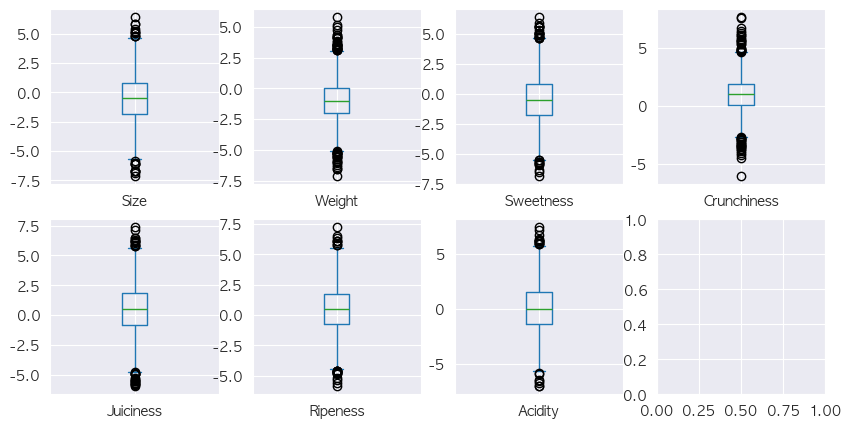

In [9]:
fig, ax = plt.subplots(2,4,figsize=(10,5))

df['Size'].plot(kind='box',ax=ax[0,0])
df['Weight'].plot(kind='box',ax=ax[0,1])
df['Sweetness'].plot(kind='box',ax=ax[0,2])
df['Crunchiness'].plot(kind='box',ax=ax[0,3])
df['Juiciness'].plot(kind='box',ax=ax[1,0])
df['Ripeness'].plot(kind='box',ax=ax[1,1])
df['Acidity'].plot(kind='box',ax=ax[1,2])


plt.show()

### 변수분포 시각화

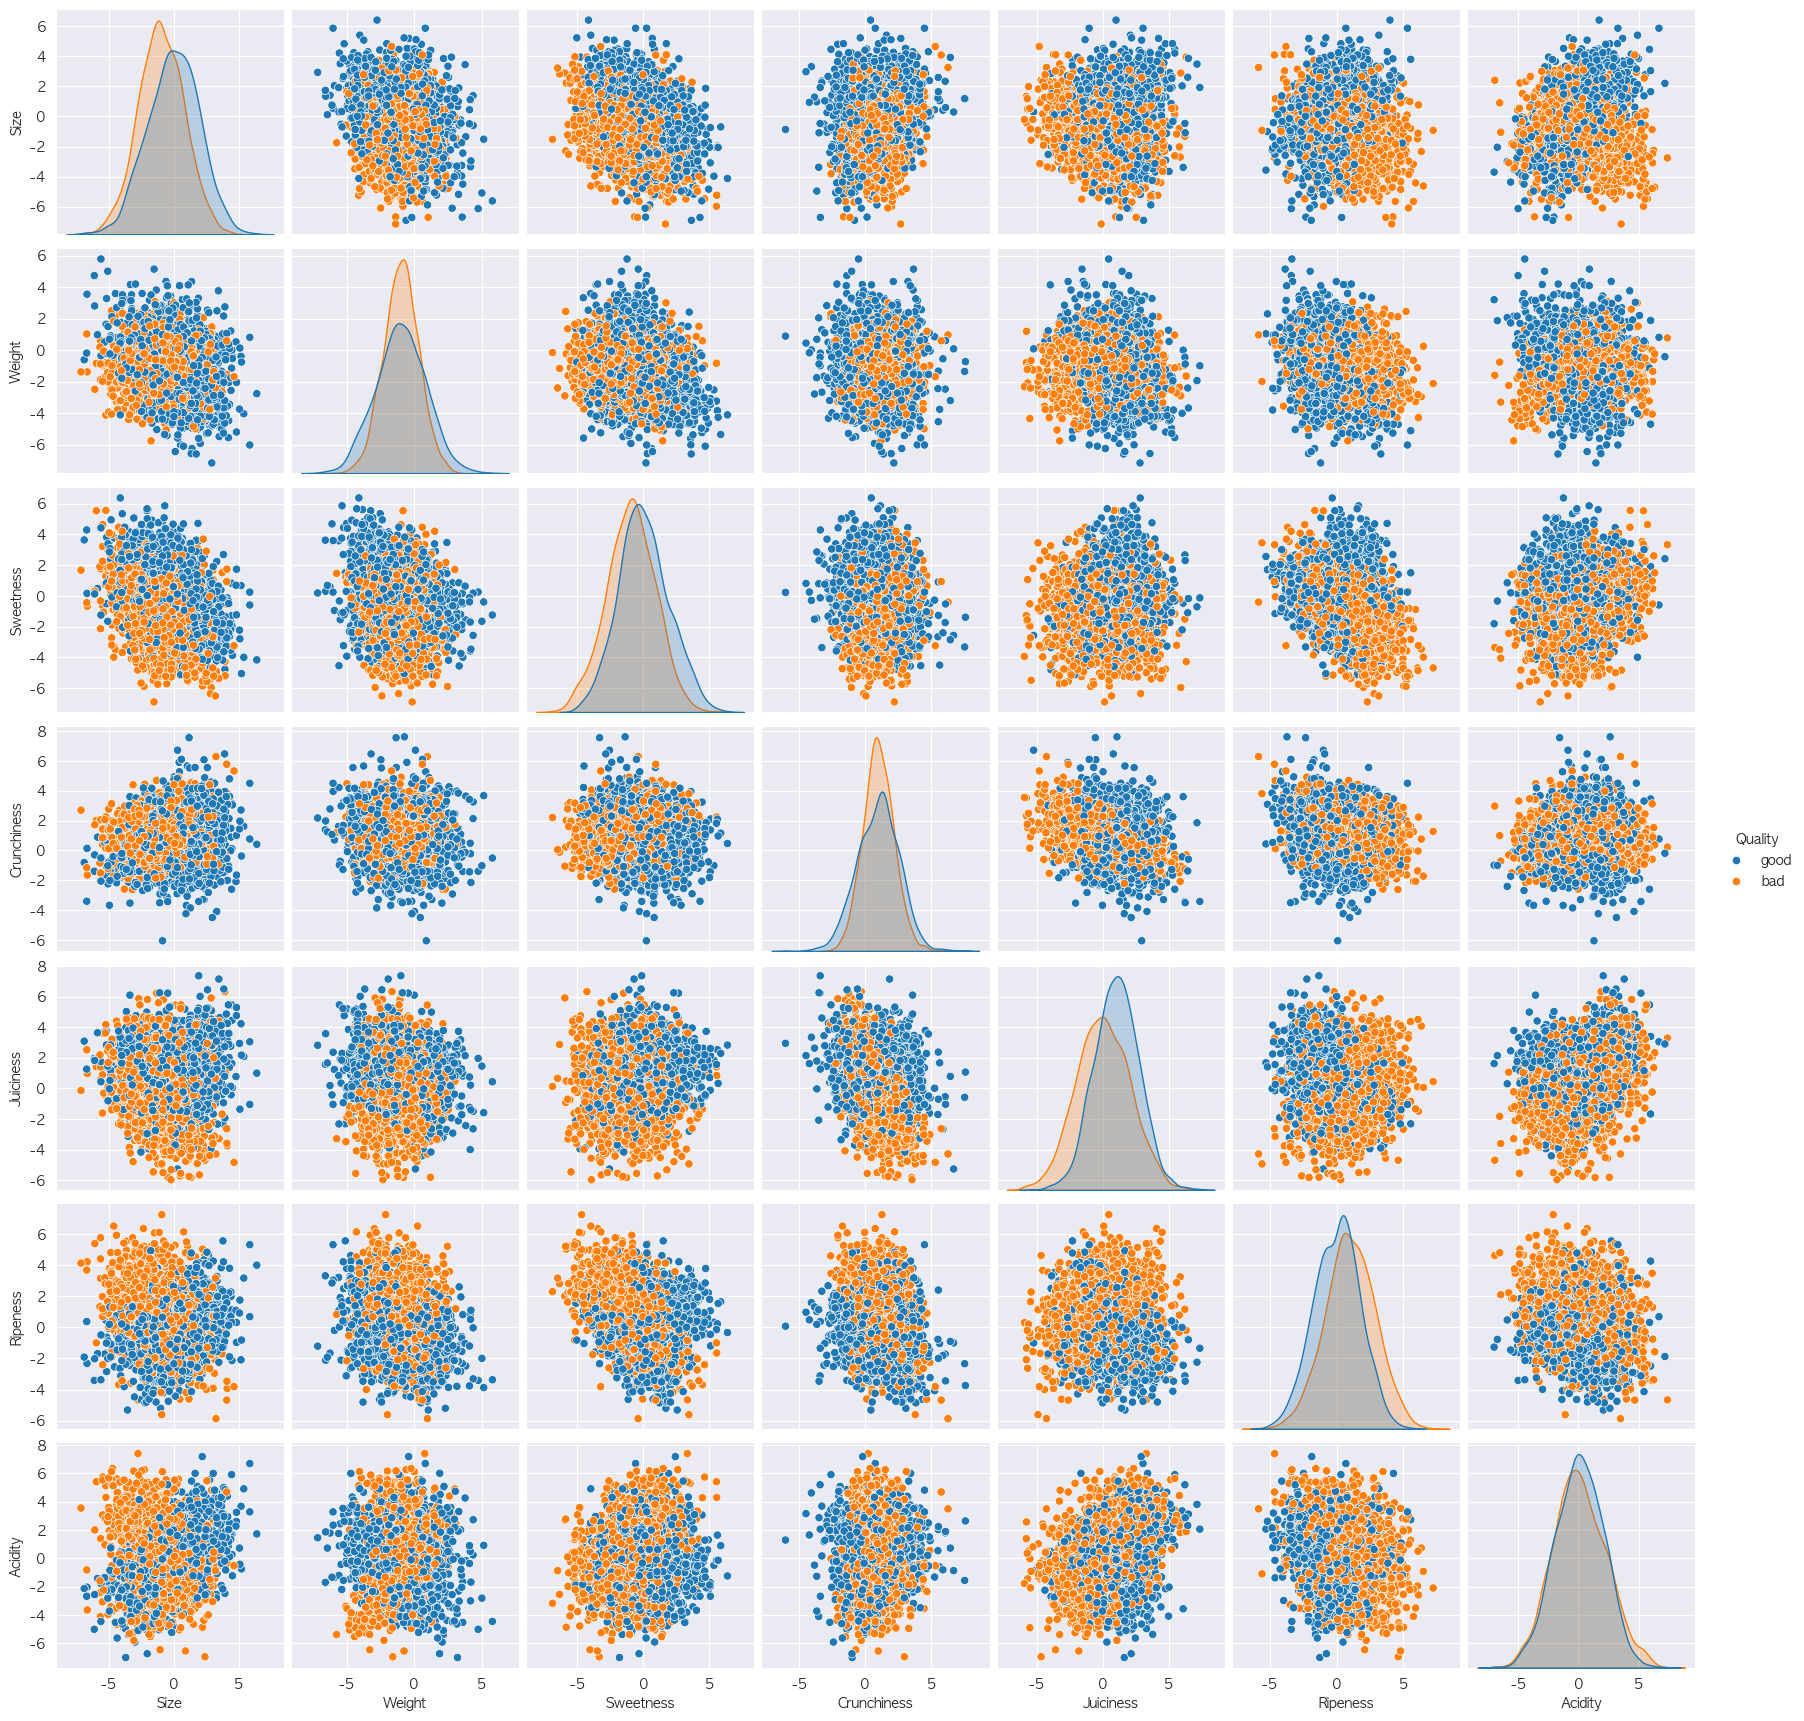

In [10]:
sns.pairplot(df,hue='Quality')
plt.show()

In [11]:
corr_mat = df.corr(numeric_only=True)
corr_mat

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000


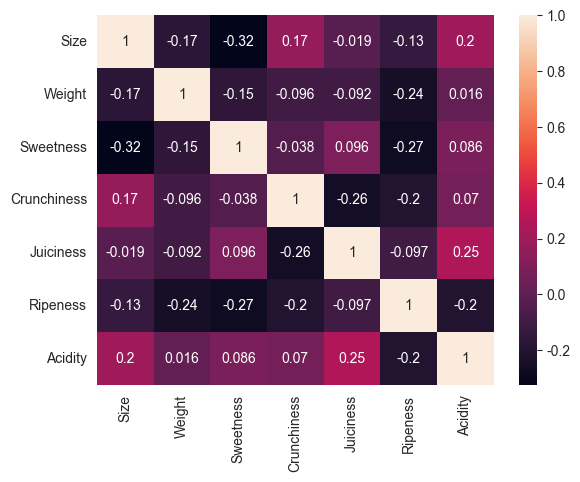

In [12]:
sns.heatmap(corr_mat, annot=True)
plt.show()

### 데이터 전처리

In [13]:
# 이상치 대체 대상 컬럼들
cols = ['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']

# 이상치 처리 함수
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    median = df[column].median()
    outlier_condition = (df[column] < lower) | (df[column] > upper)

    # 이상치 개수 출력 (선택 사항)
    print(f"{column}: {outlier_condition.sum()}개 이상치 → 중앙값으로 대체됨")

    # 이상치 대체
    df.loc[outlier_condition, column] = median
    return df

# 모든 컬럼에 대해 반복 적용
for col in cols:
    df = replace_outliers_with_median(df, col)

Size: 22개 이상치 → 중앙값으로 대체됨
Weight: 54개 이상치 → 중앙값으로 대체됨
Sweetness: 32개 이상치 → 중앙값으로 대체됨
Crunchiness: 47개 이상치 → 중앙값으로 대체됨
Juiciness: 32개 이상치 → 중앙값으로 대체됨
Ripeness: 24개 이상치 → 중앙값으로 대체됨
Acidity: 20개 이상치 → 중앙값으로 대체됨


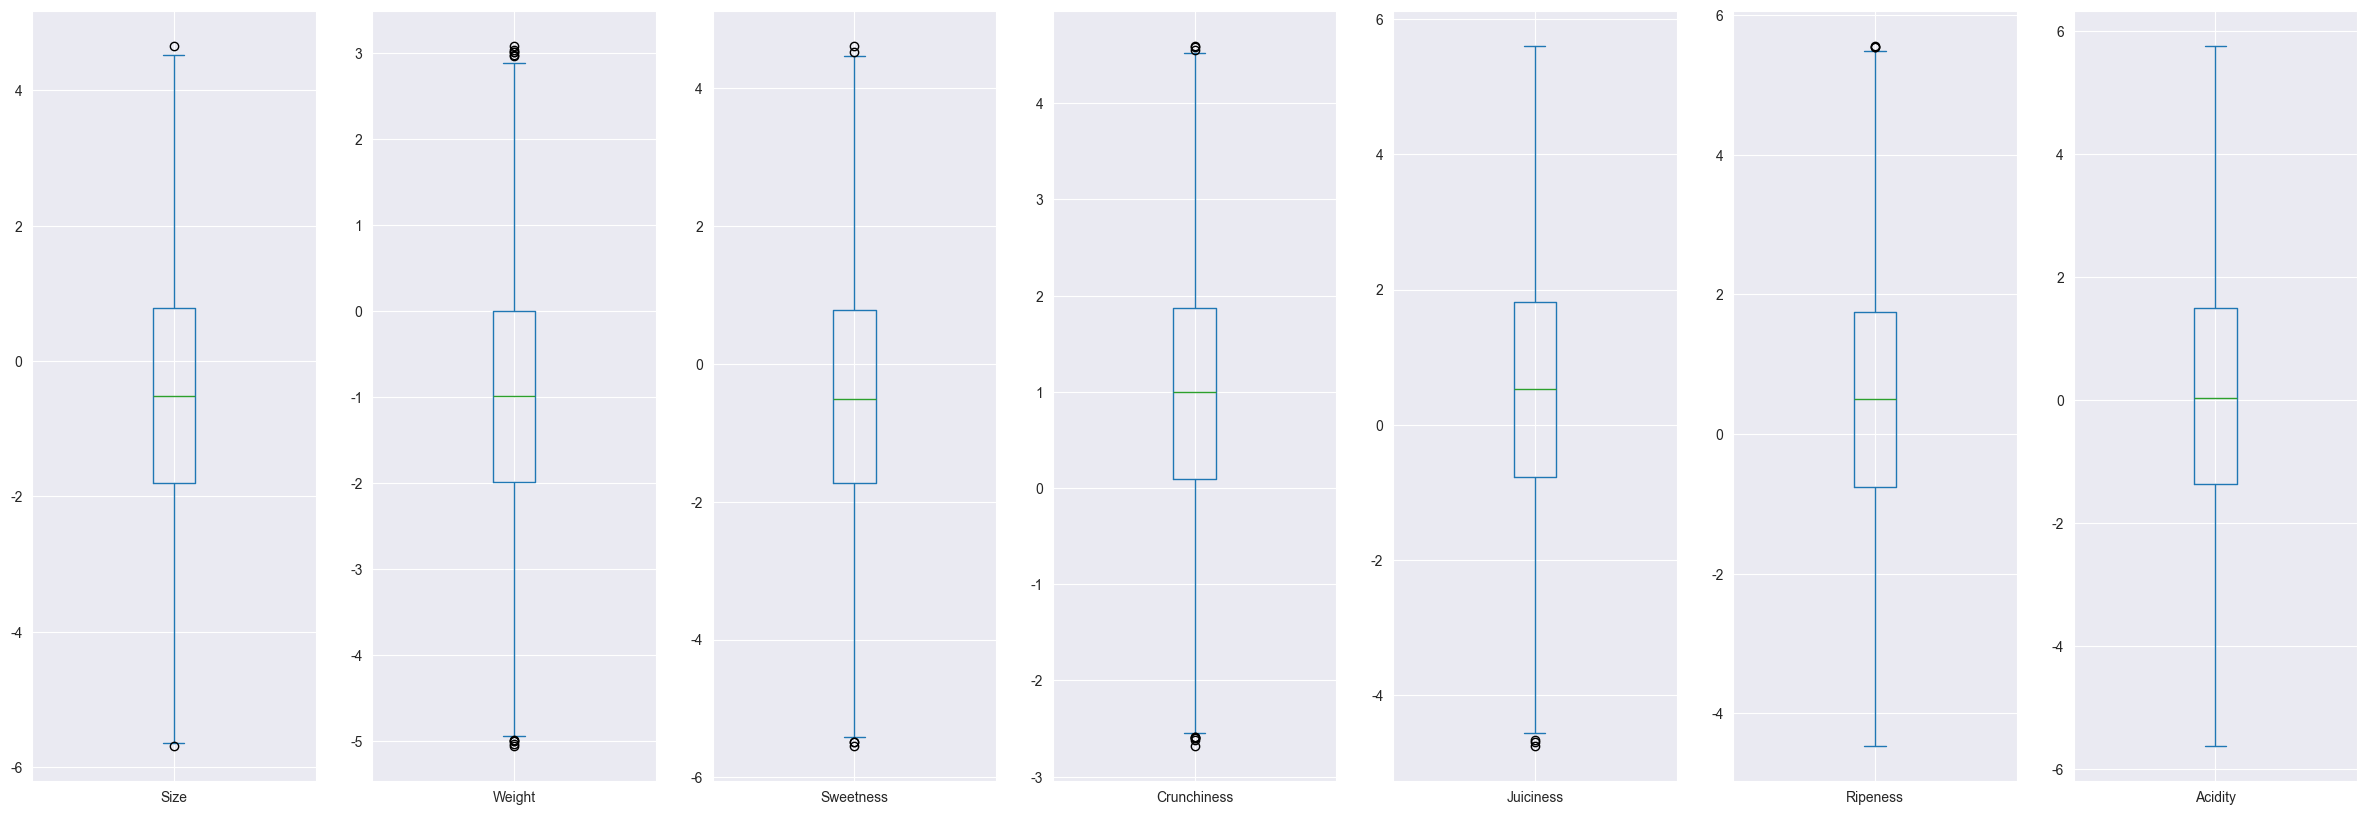

In [14]:
fig, ax = plt.subplots(1,7,figsize=(30,10))

df['Size'].plot(kind='box',ax=ax[0])
df['Weight'].plot(kind='box',ax=ax[1])
df['Sweetness'].plot(kind='box',ax=ax[2])
df['Crunchiness'].plot(kind='box',ax=ax[3])
df['Juiciness'].plot(kind='box',ax=ax[4])
df['Ripeness'].plot(kind='box',ax=ax[5])
df['Acidity'].plot(kind='box',ax=ax[6])


plt.show()

In [15]:
skewness = df.select_dtypes(include=['int64', 'float64']).skew()
print("왜도 높은 컬럼:\n", skewness[skewness > 1])


왜도 높은 컬럼:
 Series([], dtype: float64)


In [20]:
# 통계 (평균, 표준편차)
display(df.groupby('Quality')[features].agg(['mean', 'std', 'median']))

Size                        Weight                     Sweetness  \
             mean       std    median      mean       std    median      mean   
Quality                                                                         
bad     -0.959315  1.739422 -1.006030 -0.989442  1.300807 -0.975703 -0.937689   
good    -0.047988  1.900027 -0.013687 -1.009165  1.677456 -0.984736 -0.034600   

                            Crunchiness  ...           Juiciness            \
              std    median        mean  ...    median      mean       std   
Quality                                  ...                                 
bad      1.798260 -0.908050    0.989986  ...  0.977615  0.042769  1.934781   
good     1.846307 -0.149129    0.977060  ...  1.000056  0.992405  1.647434   

                   Ripeness                       Acidity                      
           median      mean       std    median      mean       std    median  
Quality                                                                        
bad      0.038212  0.985515  1.821076  0.943605  0.080873  2.154237  0.003664  
good     1.009253  0.027905  1.698995  0.117159  0.054691  1.965006  0.044849  

[2 rows x 21 columns]

/opt/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}

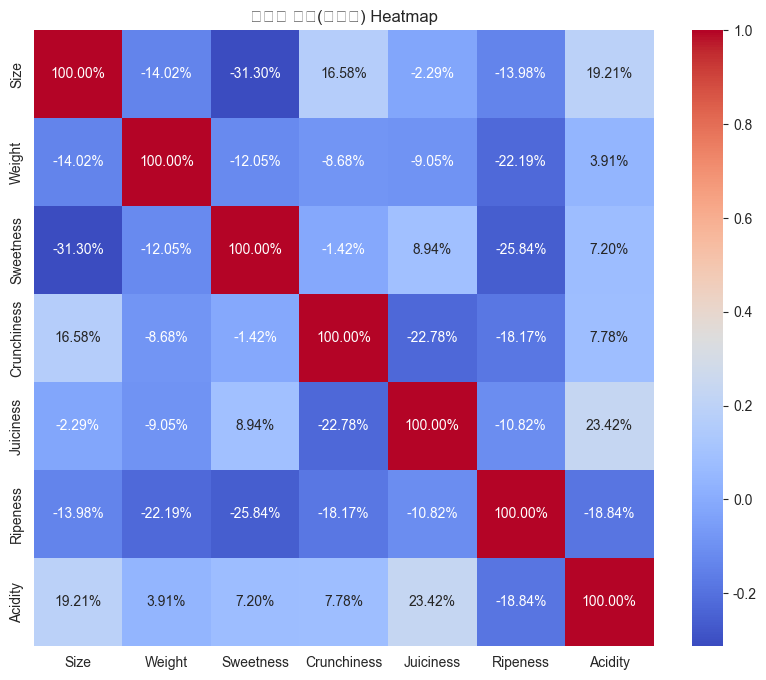

In [21]:
# 이상치 대체(중앙값) Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2%', cmap='coolwarm')
plt.title("이상치 대체(중앙값) Heatmap")
plt.show()

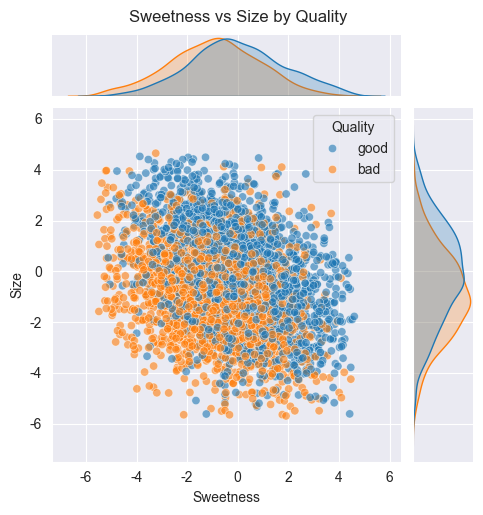

In [23]:
# 상관 높은 feature 쌍 jointplot
sns.jointplot(data=df, x='Sweetness', y='Size', hue='Quality', kind='scatter', height=5, alpha=0.6)
plt.suptitle('Sweetness vs Size by Quality', y=1.02)
plt.show()

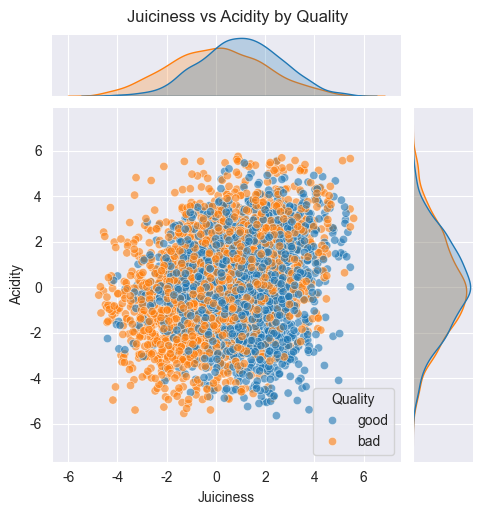

In [24]:
# 상관 높은 feature 쌍 jointplot
sns.jointplot(data=df, x='Juiciness', y='Acidity', hue='Quality', kind='scatter', height=5, alpha=0.6)
plt.suptitle('Juiciness vs Acidity by Quality', y=1.02)
plt.show()

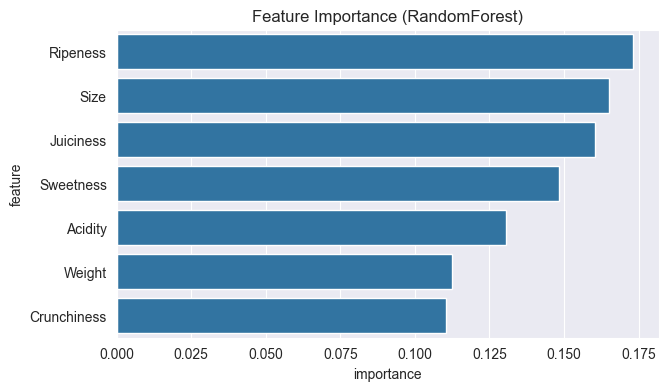

In [25]:
# Feature Importance (RandomForest로 간단히)
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
features = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

X = df[features]
y = LabelEncoder().fit_transform(df['Quality'])

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

imp_df = pd.DataFrame({'feature': features, 'importance': importances})
imp_df = imp_df.sort_values('importance', ascending=False)

plt.figure(figsize=(7,4))
sns.barplot(x='importance', y='feature', data=imp_df)
plt.title('Feature Importance (RandomForest)')
plt.show()


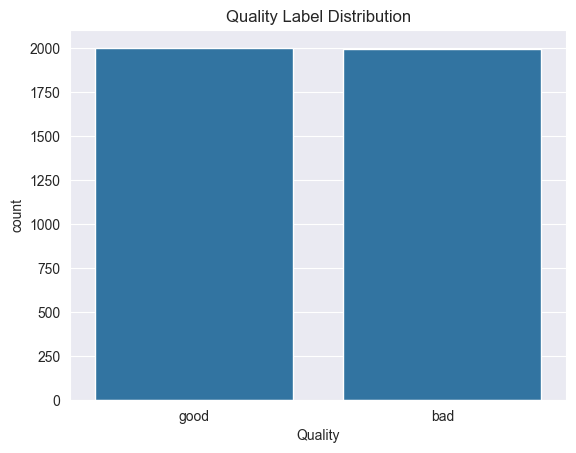

In [26]:
# 라벨 불균형 확인
sns.countplot(x='Quality', data=df)
plt.title('Quality Label Distribution')
plt.show()